# Dataset

## Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

## Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

## Acknowledgements
Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.






The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, skin thickness, blood pressure and Diabetes Pedigree Function.Their is a total of 768 columns

In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [157]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [158]:
diab = pd.read_csv("diabetes.csv")
diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [159]:
diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## No missing data

In [160]:
diab.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [161]:
%matplotlib inline
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000220D2AEFC70>,
      dtype=object)

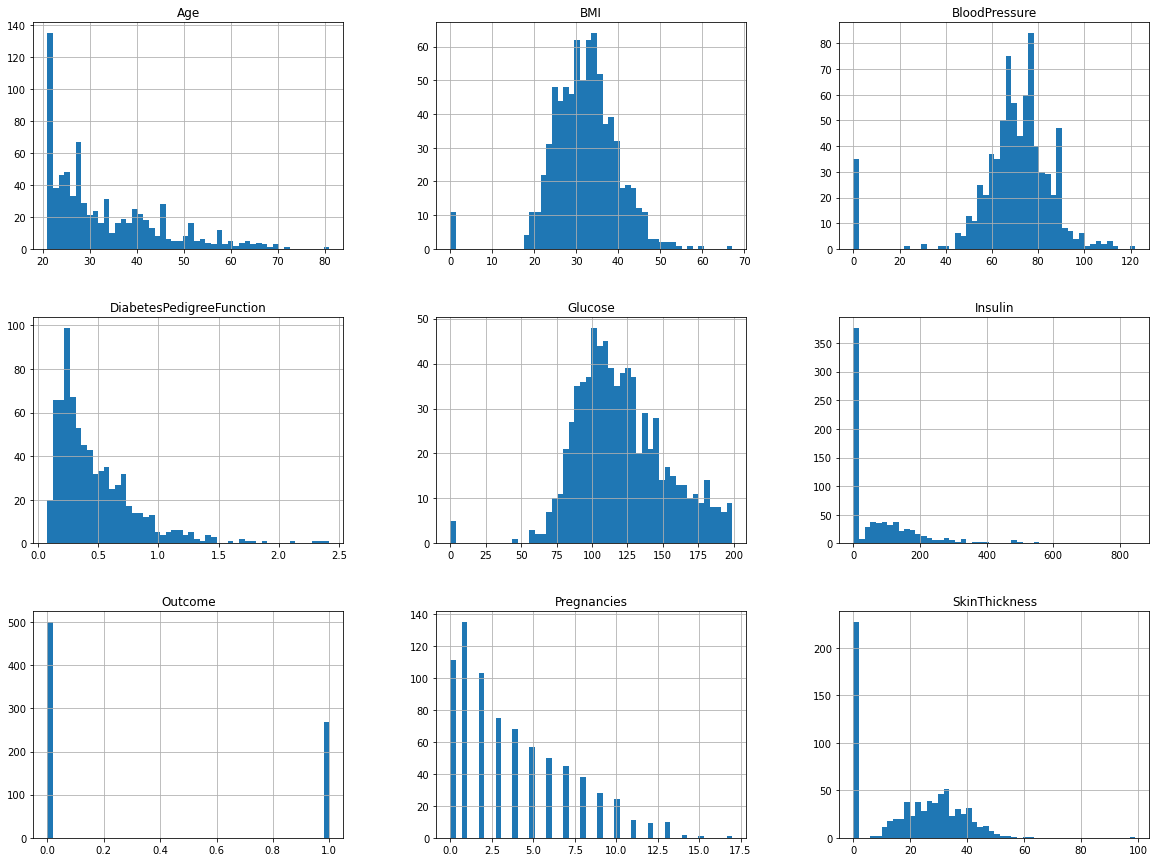

In [162]:
diab.hist(bins=50, figsize=(20,15))

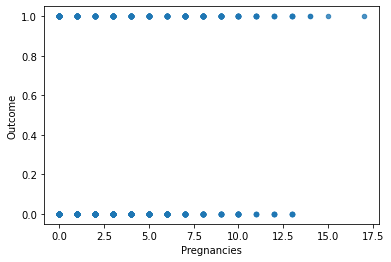

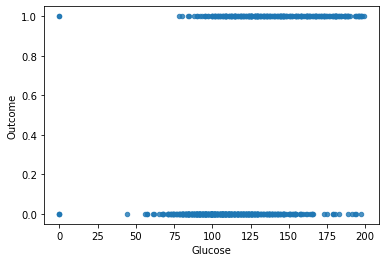

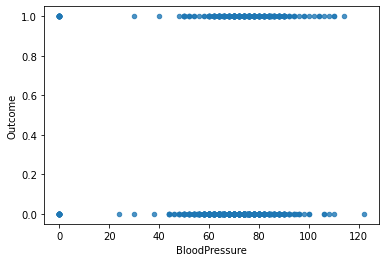

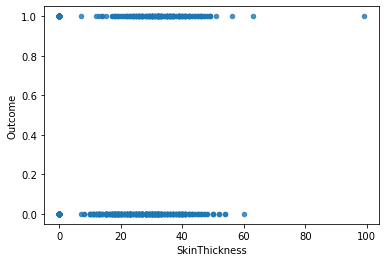

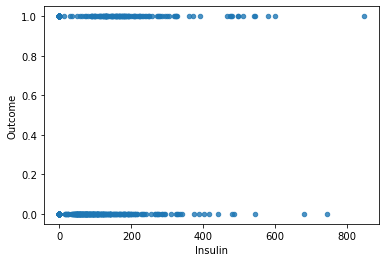

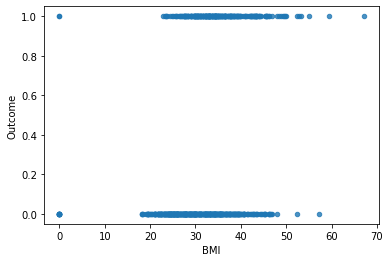

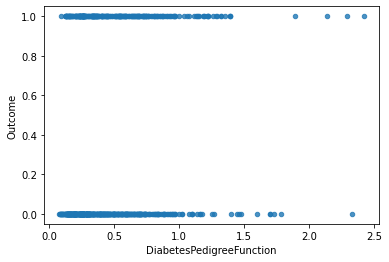

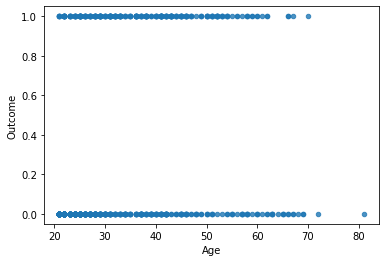

In [163]:
diab.plot(kind="scatter",x="Pregnancies",y="Outcome",alpha=0.8)
diab.plot(kind="scatter",x="Glucose",y="Outcome",alpha=0.8)
diab.plot(kind="scatter",x="BloodPressure",y="Outcome",alpha=0.8)
diab.plot(kind="scatter",x="SkinThickness",y="Outcome",alpha=0.8)
diab.plot(kind="scatter",x="Insulin",y="Outcome",alpha=0.8)
diab.plot(kind="scatter",x="BMI",y="Outcome",alpha=0.8)
diab.plot(kind="scatter",x="DiabetesPedigreeFunction",y="Outcome",alpha=0.8)
diab.plot(kind="scatter",x="Age",y="Outcome",alpha=0.8)

In [164]:
X = diab[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI' ,'Insulin', 'DiabetesPedigreeFunction', 'Age']]
y = diab['Outcome']

In [264]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

# Pie Chart

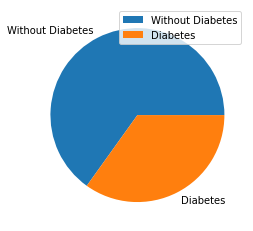

In [267]:
plt.pie([500/768, 268/768], labels = ['Without Diabetes', 'Diabetes'])
plt.legend()
plt.show() 

In [165]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=1)

In [166]:
print(f"Rows in train set1:{len(X_train1)}")
print(f"Rows in test set1:{len(X_test1)}")

Rows in train set1:614
Rows in test set1:154


In [167]:
clf = RandomForestClassifier()

clf1 = clf.fit(X_train1,y_train1)
y_pred1 = clf1.predict(X_test1)

In [168]:
y_pred1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0],
      dtype=int64)

In [169]:
y_test1


285    0
101    0
581    0
352    0
726    0
      ..
563    0
318    0
154    1
684    0
643    0
Name: Outcome, Length: 154, dtype: int64

# Confusion Matrix

In [170]:
print(metrics.confusion_matrix(y_test1,y_pred1))

[[87 12]
 [18 37]]


In [223]:
TP1 = 37
TN1 = 87
FP1 = 12
FN1 = 18

# Accuracy

In [224]:
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))
(TP1 + TN1)/(TP1 + TN1 + FP1 + FN1)

Accuracy: 0.8051948051948052


0.8051948051948052

# Precision

In [225]:
Precision1 = TP1/(FP1 + TP1)
print(Precision1)

0.7551020408163265


# Recall

In [226]:
Recall1 = TP1/(FN1 + TP1)
print(Recall1)

0.6727272727272727


# F1-Measure

In [227]:
F1_Measure1 = 2 * (Precision1 * Recall1) / (Precision1 + Recall1)
print(F1_Measure1)

0.7115384615384616


In [268]:
P1 = FN1 + TP1
print(P1)
N1 = FP1 + TN1
print(N1)

55
99


# Sensitivity

In [269]:
Sensitivity1 = TP1/P1
print(Sensitivity1)

0.6727272727272727


# Specificity

In [270]:
Specificity1 = TN1/N1
print(Specificity1)

0.8787878787878788


# False Positive Rate (FPR)

In [271]:
FPR1 = FP1/N1
print(FPR1)

0.12121212121212122


# False Negative Rate (FNR)

In [272]:
FNR1 = FN1/P1
print(FNR1)

0.32727272727272727


# Negative Predictive Value (NPV)

In [273]:
NPV1 = TN1/(TN1+FN1)
print(NPV1)

0.8285714285714286


# False Discovery Rate (FDR)

In [274]:
FDR1 = FP1/(FP1 + TP1)
print(FDR1)

0.24489795918367346


# Matthews’s correlation coefficient  (MCC)

In [275]:
MCC1 = ((TP1 * TN1) - (FP1 * FN1)) / math.sqrt((TP1 + FP1)*(TP1+FN1)*(TN1+FP1)*(TN1+FN1))
print(MCC1)

0.5673665146135801


In [184]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, random_state=1)

In [185]:
print(f"Rows in train set2:{len(X_train2)}")
print(f"Rows in test set2:{len(X_test2)}")

Rows in train set2:537
Rows in test set2:231


In [186]:
clf2 = clf.fit(X_train2,y_train2)
y_pred2 = clf2.predict(X_test2)
y_pred2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [187]:
y_test2

285    0
101    0
581    0
352    0
726    0
      ..
241    0
599    0
650    0
11     1
214    1
Name: Outcome, Length: 231, dtype: int64

# Confusion Matrix

In [188]:
print(metrics.confusion_matrix(y_test2,y_pred2))

[[130  16]
 [ 34  51]]


In [236]:
TP2 = 51
TN2 = 130
FP2 = 16
FN2 = 34

# Accuracy

In [237]:
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2))
(TP2 + TN2)/(TP2 + TN2 + FP2+ FN2)

Accuracy: 0.7835497835497836


0.7835497835497836

# Precision

In [238]:
Precision2 = TP2/(FP2 + TP2)
print(Precision2)

0.7611940298507462


# Recall

In [239]:
Recall2 = TP2/(FN2 + TP2)
print(Recall2)

0.6


# F1-Measure

In [240]:
F1_Measure2 = 2 * (Precision2 * Recall2) / (Precision2 + Recall2)
print(F1_Measure2)

0.6710526315789473


In [276]:
P2 = FN2 + TP2
print(P2)
N2 = FP2 + TN2
print(N2)

85
146


# Sensitivity

In [277]:
Sensitivity2 = TP2/P2
print(Sensitivity2)

0.6


# Specificity

In [278]:
Specificity2 = TN2/N2
print(Specificity2)

0.8904109589041096


# False Positive Rate (FPR)

In [279]:
FPR2 = FP2/N2
print(FPR2)

0.1095890410958904


# False Negative Rate (FNR)

In [280]:
FNR2 = FN2/P2
print(FNR2)

0.4


# Negative Predictive Value (NPV)

In [281]:
NPV2 = TN2/(TN2+FN2)
print(NPV2)

0.7926829268292683


# False Discovery Rate (FDR)

In [282]:
FDR2 = FP2/(FP2 + TP2)
print(FDR2)

0.23880597014925373


# Matthews’s correlation coefficient  (MCC)

In [283]:
MCC2 = ((TP2 * TN2) - (FP2 * FN2)) / math.sqrt((TP2 + FP2)*(TP2 + FN2)*(TN2+FP2)*(TN2+FN2))
print(MCC2)

0.5211787883637783


In [202]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.4, random_state=1)

In [203]:
print(f"Rows in train set3:{len(X_train3)}")
print(f"Rows in test set3:{len(X_test3)}")

Rows in train set3:460
Rows in test set3:308


In [204]:
clf3 = clf.fit(X_train3,y_train3)
y_pred3 = clf3.predict(X_test3)
y_pred3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,

In [205]:
y_test3

285    0
101    0
581    0
352    0
726    0
      ..
486    0
600    0
38     1
659    1
345    0
Name: Outcome, Length: 308, dtype: int64

# Confusion Matrix

In [206]:
print(metrics.confusion_matrix(y_test3,y_pred3))

[[174  25]
 [ 47  62]]


In [249]:
TP3 = 62
TN3 = 174
FP3 = 25
FN3 = 47

# Accuracy

In [250]:
print("Accuracy:",metrics.accuracy_score(y_test3, y_pred3))
(TP3 + TN3)/(TP3 + TN3 + FP3 + FN3)

Accuracy: 0.7662337662337663


0.7662337662337663

# Precision

In [251]:
Precision3 = TP3/(FP3 + TP3)
print(Precision3)

0.7126436781609196


# Recall

In [252]:
Recall3 = TP3/(FN3 + TP3)
print(Recall3)

0.5688073394495413


# F-1 Measure

In [253]:
F1_Measure3 = 2 * (Precision3 * Recall3) / (Precision3 + Recall3)
print(F1_Measure3)

0.6326530612244898


In [284]:
P3 = FN3 + TP3
print(P3)
N3 = FP3 + TN3
print(N3)

109
199


# Sensitivity

In [285]:
Sensitivity3 = TP3/P3
print(Sensitivity3)

0.5688073394495413


# Specificity

In [286]:
Specificity3 = TN3/N3
print(Specificity3)

0.8743718592964824


# False Positive Rate (FPR)

In [287]:
FPR3 = FP3/N3
print(FPR3)

0.12562814070351758


# False Negative Rate (FNR)

In [288]:
FNR3 = FN3/P3
print(FNR3)

0.43119266055045874


# Negative Predictive Value (NPV)

In [289]:
NPV3 = TN3/(TN3 + FN3)
print(NPV3)

0.7873303167420814


# False Discovery Rate (FDR)

In [290]:
FDR3 = FP3/(FP3 + TP3)
print(FDR3)

0.28735632183908044


# Matthews’s correlation coefficient  (MCC)

In [291]:
MCC3 = ((TP3*TN3)-(FP3*FN3))/(math.sqrt((TP3+FP3)*(TP3+FN3)*(TN3+FP3)*(TN3+FN3)))
print(MCC3)

0.4707208030828471


# ROC Curve

In [293]:
from sklearn.metrics import roc_curve, auc

In [294]:
r_fpr1, r_tpr1, _ = roc_curve(y_test1, y_pred1)
r_fpr2, r_tpr2, _ = roc_curve(y_test2, y_pred2)
r_fpr3, r_tpr3, _ = roc_curve(y_test3, y_pred3)

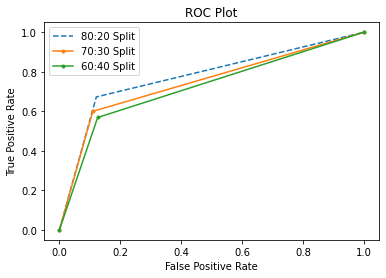

In [295]:
plt.plot(r_fpr1, r_tpr1, linestyle='--', label='80:20 Split')
plt.plot(r_fpr2, r_tpr2, marker='.', label='70:30 Split')
plt.plot(r_fpr3, r_tpr3, marker='.', label='60:40 Split')

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()